In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

The dataset we will use here to perform the analysis and build a predictive model is Tesla Stock price data. We will use OHLC('Open','High', 'Low', 'Close') data from 1st januray 2010 to 31st December 2017 which is for 8 years for the Tesla stocks.

In [78]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


From the first five rows, we can see that data for some of the dates is missing the reason for that is on weekends and holidays Stock Market remains closed hence no trading happens on these days.

In [79]:
df.shape

(2956, 7)

From this, we got to know that there are 1761 rows of data available and for each row, we have 7 different features or columns.

In [80]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


#Explore Data Analysis

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.
While performing the EDA of the Tesla Stock Price data we will analyze how price of the stock have moved over the period of time and how the end of the quarters affects the prices of stock.

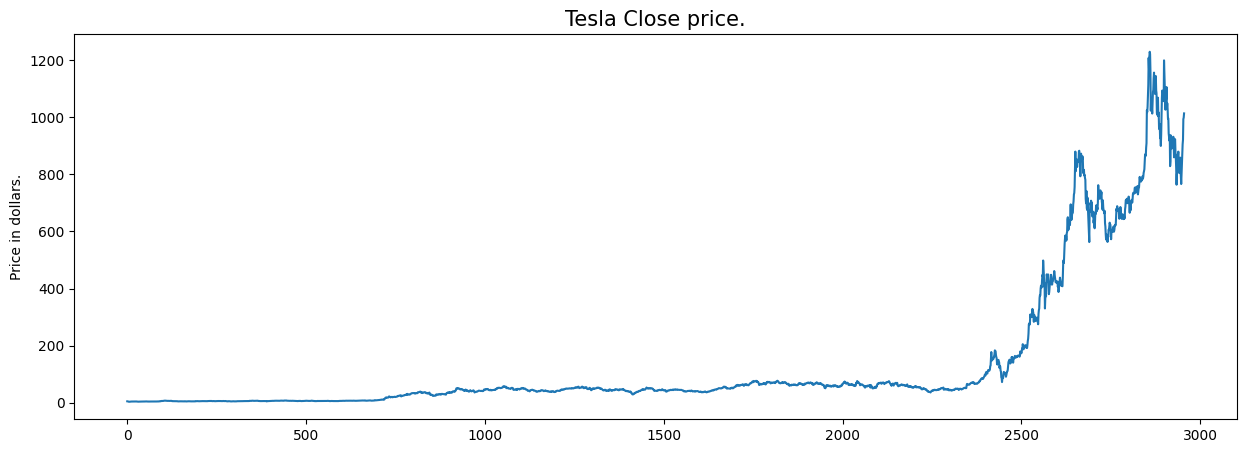

In [82]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

The price of Tesla stocks are showing an upward tredn as depicted by the plot of the closing price of the stocks.

In [83]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


If we observe carefully we can see that the data in the 'Close' column and that available in the 'Adj Close' column is the same let's check whether this is the case with each row or not.

In [84]:
df[df['Close'] == df['Adj Close']].shape

(2956, 7)

From here we can conclude that all the rows of columns 'Close' and 'Adj Close' have the same data. so, having redundant data in the dataset is not going to help so, we'll drop this column before further analysis.

In [85]:
df = df.drop(['Adj Close'], axis=1)

Now let's draw the distribution plot for the continous features given in the dataset.
Before moving further let's check for the null values if any are present in the data frame.

In [86]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


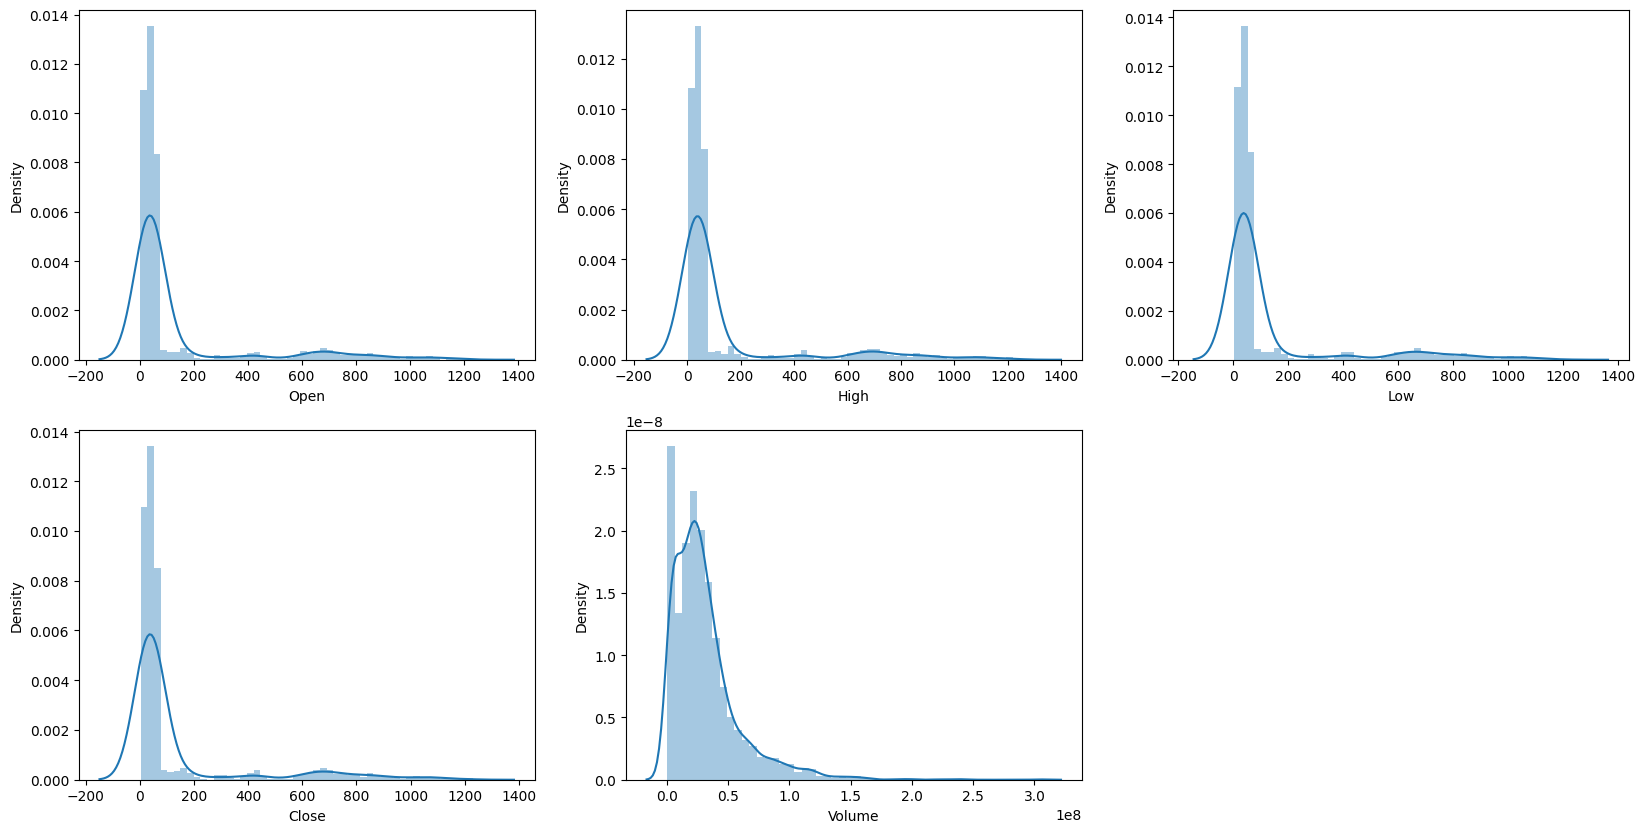

In [87]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

In the distribution plot of OHLC data, we can see two peaks which means the data has varied signifivantly in two regions. And the Volume data is left-skewed.

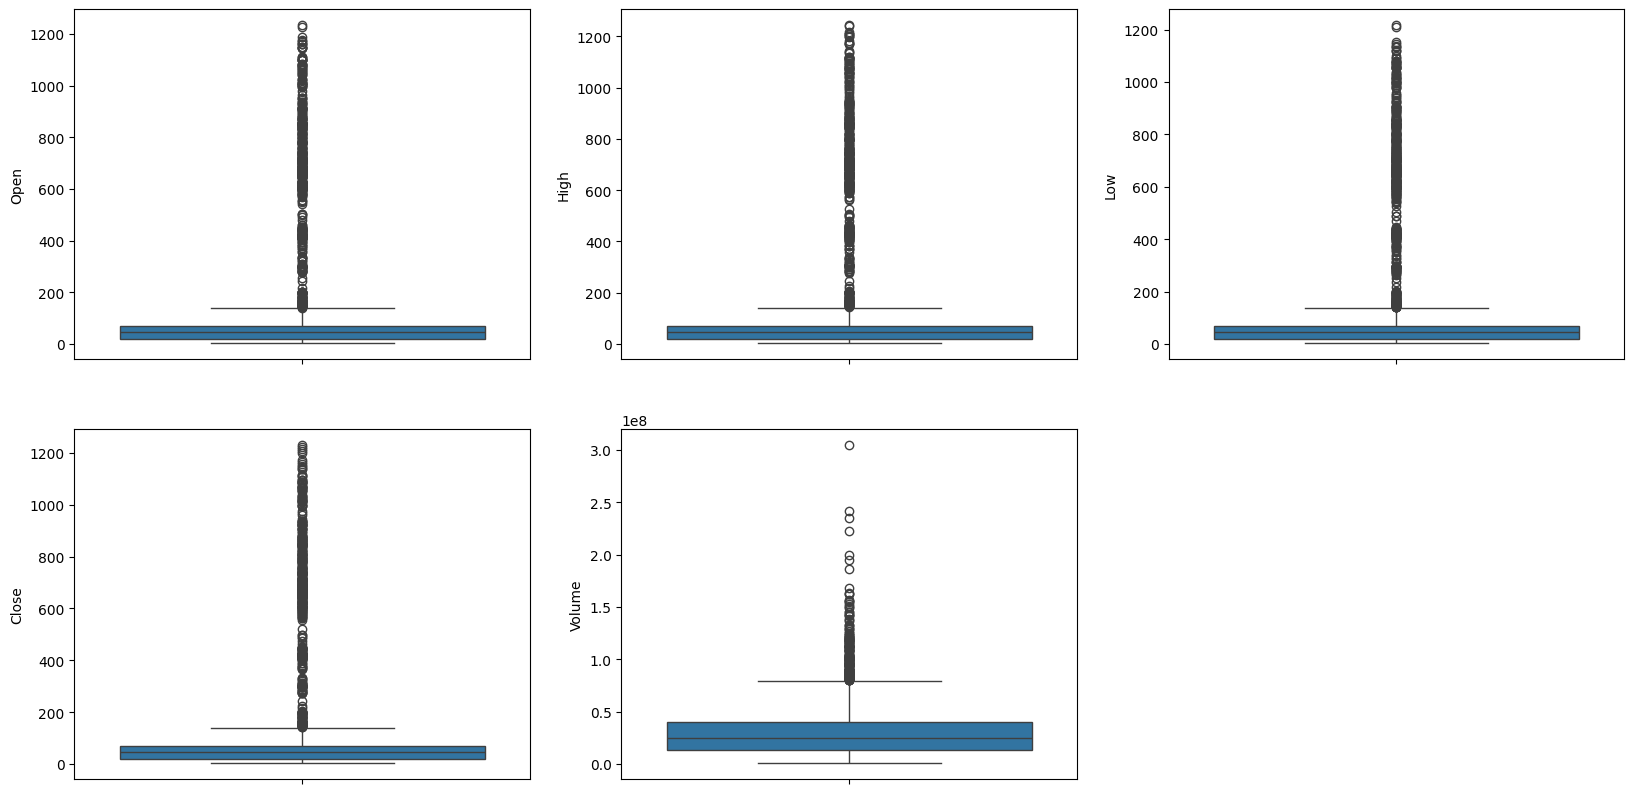

In [88]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

From the above boxplots, we can cinclude that only colume data contains outliers in it but the data in the rest of the columns are free from any outlier.



# Feature Engineering



Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [89]:
splitted = df['Date'].str.split('/', expand=True)

# Check the column names of 'splitted'
print(splitted.columns)

# Check the contents of 'splitted' to see if it split correctly
print(splitted.head())

# If the split didn't work as expected, adjust the delimiter or logic
# For example, if the dates are in 'YYYY-MM-DD' format:
splitted = df['Date'].str.split('-', expand=True)

# Now access the columns
df['day'] = splitted[splitted.columns[2]].astype('int')  # Day is now in the third column (index 2)
df['month'] = splitted[splitted.columns[1]].astype('int') # Month is in the second column (index 1)
df['year'] = splitted[splitted.columns[0]].astype('int') # Year is in the first column (index 0)

df.head()

RangeIndex(start=0, stop=1, step=1)
            0
0  2010-06-29
1  2010-06-30
2  2010-07-01
3  2010-07-02
4  2010-07-06


,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010


Now we have three more columns namely 'day', 'month' and 'year' all these three have been derived from the 'Date' column which was initially provided in the data.

In [90]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010,1
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010,1
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010,0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010,0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010,0


A quarter is deifned as a group of three months.Every company prepares it's quartely results and publishes them publicly so, that people can analyze the company's performance. These quartely results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learnig model.

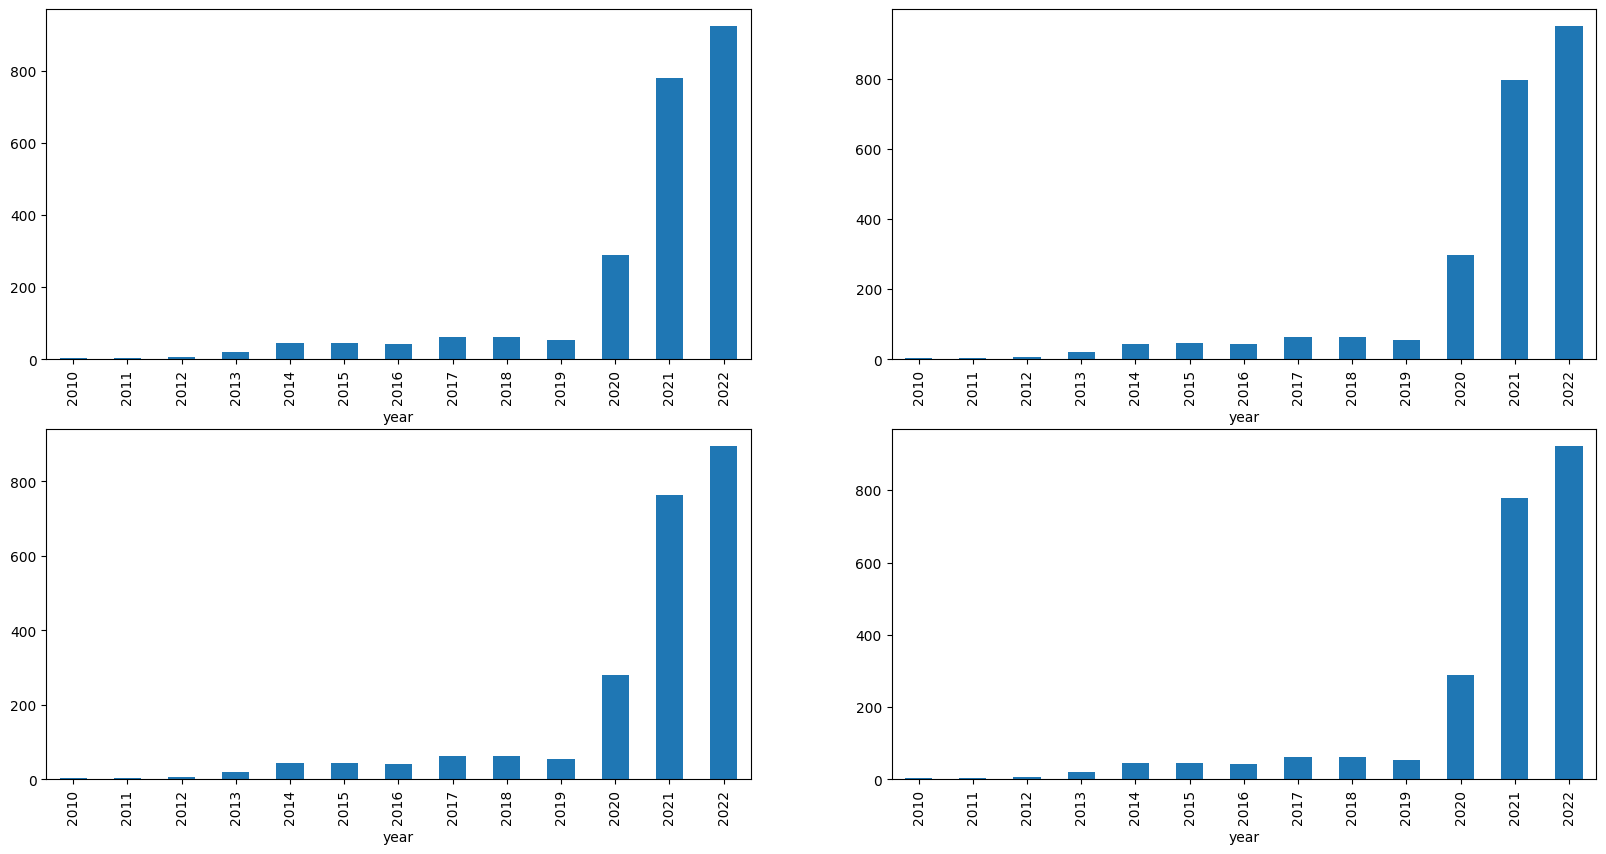

In [91]:
# Convert 'year' column to numeric if it's not already
df['year'] = df['year'].astype('int')

# Calculate the mean, explicitly handling non-numeric values
# Use a list to select multiple columns
data_grouped = df.groupby('year')[['Open', 'High', 'Low', 'Close']].apply(lambda x: x.astype(float).mean())

plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

From the above bar graph, we can conclude that the stock prices have doubled from the year 2013 to that in 2014.

In [92]:
# Convert 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the mean for numeric columns only
df.groupby('is_quarter_end').mean(numeric_only=True)

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,136.474690,139.523037,133.361644,136.531872,3.194378e+07,15.701987,6.124300,2015.855833
1,143.073168,146.216652,139.506757,143.171146,3.007048e+07,15.736153,7.489426,2015.852971


Here are some of the important observations of the above-grouped data:
1- Price are higher in the months which are quarter end as compared to that of the non-quarter end months.
2- The volum of trades is lower in the months which are quarter end.

In [93]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal wheter to buy or not we will train our model to predict this only. But before proceeding let's check wheter the target is balanced or not using a pie chart.

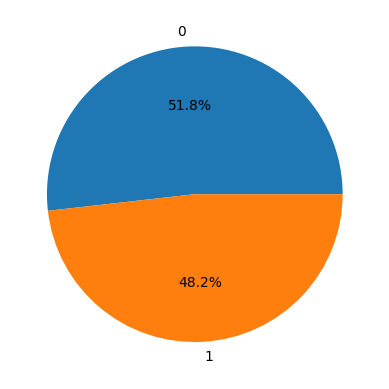

In [94]:
plt.pie(df['target'].value_counts().values,
        labels=[0,1], autopct= '%1.1f%%')
plt.show()


When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorighm.

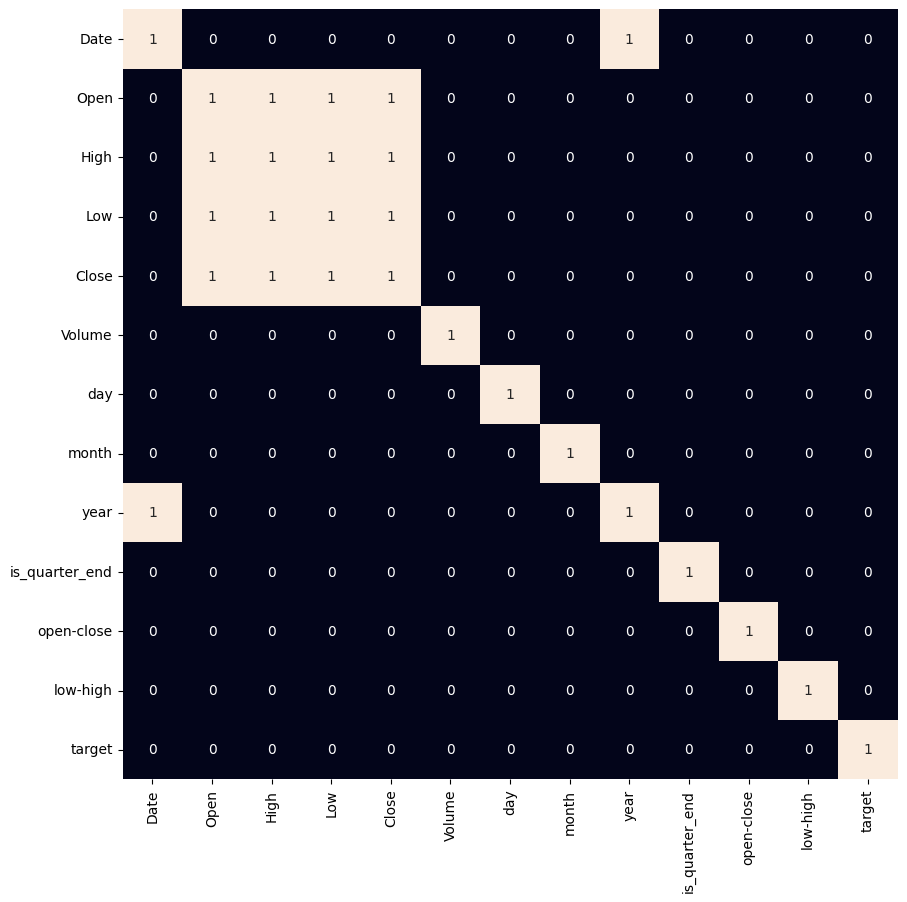

In [95]:
plt.figure(figsize=(10,10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above heatmap. we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

# Data splitting and Normaliztion

In [96]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2660, 3) (296, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

# Model Development and Evaluation

Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

In [97]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5144548991864166
Validation Accuracy :  0.5384615384615384

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.49962730810045985
Validation Accuracy :  0.5403388278388278

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.

Now let’s plot a confusion matrix for the validation data.

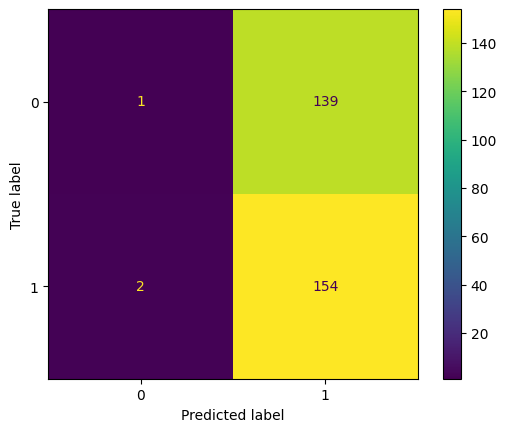

In [102]:

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

Conclusion:
We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.